# Exercises for Hughes and Hase: Chapter 4

Python activities to complement Measurements and their Uncertainties, Chapter 4, "Error propagation." Section numbers in the book correspond to those listed below.

<-- General comments on how to use Jupyter Notebook -->

## 4.1 Propagating the error in a single-variable function

Reproduce Fig. 4.1(a). The caption says that this shows Bragg's law for a silicon single crystal. This is incorrect: silicon has a room temperature lattice constant of $a = 0.5431$ nm, which gives $\lambda = 2 a = 1.1$ nm for $\theta = \frac{\pi}{2}$, as shown in the plot. But silicon's diamond structure suppresses Bragg scattering from planes with this spacing; Bragg scattering is allowed, however, for lattice planes $d=a/\sqrt{3} = 0.3$ nm, which would give $\lambda = 2 a/\sqrt{2} = 0.63$  nm for $\theta = \frac{\pi}{2}$ . We'll ignore this oversight so that we can compare results with the book.

Text(80, 0.8, '(a)')

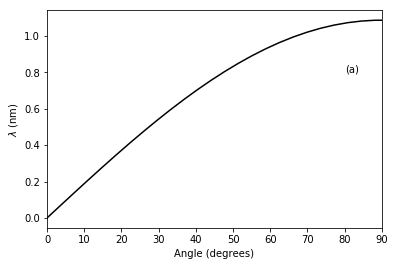

In [20]:
# import numpy library and name it "np".
import numpy as np
# import matplotlib.pyplot and name it "plt"
import matplotlib.pyplot as plt

d = 0.5431 # (nm)
theta_rad = np.linspace(0, np.pi) # Python uses radians for angles
theta_deg = np.degrees(theta_rad)

plt.plot(theta_deg, 2*d*np.sin(theta_rad), 'k-')
plt.xlabel('Angle (degrees)')
plt.xlim(0, 90)
plt.ylabel('$\lambda$ (nm)')
plt.text(80, 0.8, '(a)')

## 4.1.1 The functional approach for single-variable functions
Consider a fixed angular uncertainty of $\alpha_{\theta}=0.05^\circ$.

In [21]:
alpha_theta_deg = 0.05
alpha_theta_rad = np.deg2rad(alpha_theta_deg)

Confirm the wavelength uncertainties given in the text.

In [26]:
theta_eval_deg = np.array([15, 75])
theta_eval_rad = np.deg2rad(theta_eval_deg)

alpha_lambda = 2*d*(np.sin(theta_eval_rad + alpha_theta_rad) - np.sin(theta_eval_rad))


print(np.around(1e3 * alpha_lambda, decimals=4)) # Display in units of pm

[0.9155 0.2449]


Reproduce Fig. 4.1(b) for $\bar{\theta} = 75^{\circ}$, where the $\sin$ function is more nonlinear. 
<-- comments on how to plot in Python --> 

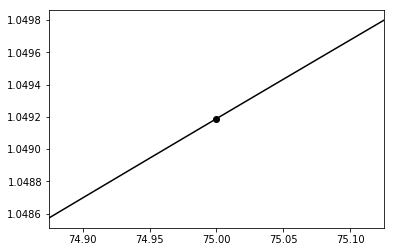

In [38]:
theta_bar_deg = theta_eval_deg[1]
theta_bar_rad = np.deg2rad(theta_bar_deg)
theta_interval_deg = theta_bar_deg+alpha_theta_deg*np.array([-1,1])
theta_interval_rad = np.deg2rad(theta_interval_deg)
theta_lim = theta_bar_deg + 2.5*alpha_theta_deg*np.array([-1,1])
theta_deg = np.linspace(theta_lim[0],theta_lim[1])
theta_rad = np.deg2rad(theta_deg)

# Plot theory curve
plt.plot(theta_deg, 2*d*np.sin(theta_rad), 'k-')
plt.xlim(theta_lim)


plt.plot(theta_bar_deg, 2*d*np.sin(theta_bar_rad), 'ko')